In [1]:
# Importing relevant libraries
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import mglearn

%matplotlib inline

## Load Dataset


In [4]:
cancer = load_breast_cancer()
print('Cancer keys: {}'.format(cancer.keys()))

Cancer keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print('Shape of cancer dataset: {}'.format(cancer.data.shape))

Shape of cancer dataset: (569, 30)


In [6]:
print('Sample count per class: \n {}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample count per class: 
 {'malignant': 212, 'benign': 357}


In [7]:
print('Feature names: \n {}'.format(cancer.feature_names))

Feature names: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Splitting the dataset

In [9]:
X = cancer.data
print("Features shape:", X.shape)
Y = cancer.target
print("Targets shape:", Y.shape)

Features shape: (569, 30)
Targets shape: (569,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, random_state = 66)

print('Training feature matrix size: ', X_train.shape)
print('Test feature matrix size: ', X_test.shape)
print('Training target vector size: ', y_train.shape)
print('Test target vector size: ', y_test.shape)

Training feature matrix size:  (426, 30)
Test feature matrix size:  (143, 30)
Training target vector size:  (426,)
Test target vector size:  (143,)


## Training the model

<function matplotlib.pyplot.legend(*args, **kwargs)>

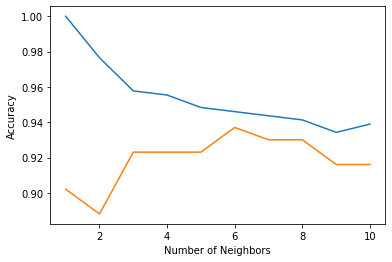

In [14]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try neighbors_settings from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors_ in neighbors_settings:
    # Build the model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors_)
    clf.fit(X_train, y_train)
    # Record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # Record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = 'Training accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend

In [18]:
from sklearn.metrics import confusion_matrix

clf = KNeighborsClassifier(n_neighbors = 6)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[48  5]
 [ 4 86]]


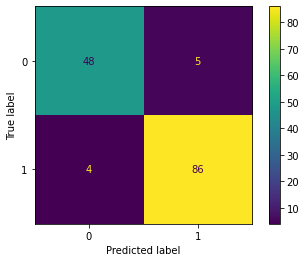

In [19]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)